In [2]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 



/kaggle/input/australian-housing-data-1000-properties-sampled/RealEstateAU_1000_Samples.csv


In [3]:
filepath = "/Sumanka/Documents/DS/RealEstateAU_1000_Samples.csv"

data_import = pd.read_csv(filepath)

data_import.head()

index      TID          breadcrumb  \
0      0  1350988  Buy>NT>DARWIN CITY   
1      1  1350989  Buy>NT>DARWIN CITY   
2      2  1350990  Buy>NT>DARWIN CITY   
3      3  1350991  Buy>NT>DARWIN CITY   
4      4  1350992  Buy>NT>DARWIN CITY   

                                       category_name property_type  \
0  Real Estate & Property for sale in DARWIN CITY...         House   
1  Real Estate & Property for sale in DARWIN CITY...     Apartment   
2  Real Estate & Property for sale in DARWIN CITY...          Unit   
3  Real Estate & Property for sale in DARWIN CITY...         House   
4  Real Estate & Property for sale in DARWIN CITY...          Unit   

  building_size land_size preferred_size           open_date  \
0           NaN       NaN            NaN   Added 2 hours ago   
1         171m²       NaN          171m²   Added 7 hours ago   
2           NaN       NaN            NaN  Added 22 hours ago   
3           NaN       NaN            NaN     Added yesterday   
4         201m²       NaN          201m²     Added yesterday   

                                    listing_agency                 price  \
0                      Professionals - DARWIN CITY              $435,000   
1  Nick Mousellis Real Estate - Eview Group Member  Offers Over $320,000   
2                Habitat Real Estate - THE GARDENS              $310,000   
3                           Ray White - NIGHTCLIFF              $259,000   
4              Carol Need Real Estate - Fannie Bay              $439,000   

   location_number location_type         location_name  \
0        139468611           Buy              $435,000   
1        139463755           Buy  Offers Over $320,000   
2        139462495           Buy              $310,000   
3        139451679           Buy              $259,000   
4        139433803           Buy              $439,000   

                                         address                address_1  \
0          44 Woods Street, Darwin City, NT 0800          44 Woods Street   
1     14/14 Dashwood Place, Darwin City, NT 0800     14/14 Dashwood Place   
2      13/86  Woods Street, Darwin City, NT 0800      13/86  Woods Street   
3  1309/43B Knuckey Street, Darwin City, NT 0800  1309/43B Knuckey Street   
4    3/10 McLachlan Street, Darwin City, NT 0800    3/10 McLachlan Street   

          city state  zip_code         phone  latitude  longitude  \
0  Darwin City    NT       800  08 8941 8289       NaN        NaN   
1  Darwin City    NT       800    0411724000       NaN        NaN   
2  Darwin City    NT       800  08 8981 0080       NaN        NaN   
3  Darwin City    NT       800  08 8982 2403       NaN        NaN   
4  Darwin City    NT       800    0418885966       NaN        NaN   

  product_depth  bedroom_count  bathroom_count  parking_count  \
0      premiere            2.0             1.0            1.0   
1      premiere            3.0             2.0            2.0   
2      premiere            2.0             1.0            1.0   
3      premiere            1.0             1.0            0.0   
4      premiere            3.0             2.0            2.0   

               RunDate  
0  2022-05-27 15:54:05  
1  2022-05-27 15:54:05  
2  2022-05-27 15:54:05  
3  2022-05-27 15:54:05  
4  2022-05-27 15:54:05

In [4]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1000 non-null   int64  
 1   TID              1000 non-null   int64  
 2   breadcrumb       1000 non-null   object 
 3   category_name    1000 non-null   object 
 4   property_type    1000 non-null   object 
 5   building_size    280 non-null    object 
 6   land_size        533 non-null    object 
 7   preferred_size   609 non-null    object 
 8   open_date        302 non-null    object 
 9   listing_agency   1000 non-null   object 
 10  price            1000 non-null   object 
 11  location_number  1000 non-null   int64  
 12  location_type    1000 non-null   object 
 13  location_name    1000 non-null   object 
 14  address          988 non-null    object 
 15  address_1        988 non-null    object 
 16  city             1000 non-null   object 
 17  state          

In [5]:
model_df = data_import.drop(['index','TID','breadcrumb','category_name','open_date','listing_agency','location_number','location_type','address','address_1','zip_code','phone','latitude','longitude','building_size','location_name','state'],axis = 1)
model_df.head()

property_type land_size preferred_size                 price         city  \
0         House       NaN            NaN              $435,000  Darwin City   
1     Apartment       NaN          171m²  Offers Over $320,000  Darwin City   
2          Unit       NaN            NaN              $310,000  Darwin City   
3         House       NaN            NaN              $259,000  Darwin City   
4          Unit       NaN          201m²              $439,000  Darwin City   

  product_depth  bedroom_count  bathroom_count  parking_count  \
0      premiere            2.0             1.0            1.0   
1      premiere            3.0             2.0            2.0   
2      premiere            2.0             1.0            1.0   
3      premiere            1.0             1.0            0.0   
4      premiere            3.0             2.0            2.0   

               RunDate  
0  2022-05-27 15:54:05  
1  2022-05-27 15:54:05  
2  2022-05-27 15:54:05  
3  2022-05-27 15:54:05  
4  2022-05-27 15:54:05

In [6]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   1000 non-null   object 
 1   land_size       533 non-null    object 
 2   preferred_size  609 non-null    object 
 3   price           1000 non-null   object 
 4   city            1000 non-null   object 
 5   product_depth   1000 non-null   object 
 6   bedroom_count   967 non-null    float64
 7   bathroom_count  967 non-null    float64
 8   parking_count   967 non-null    float64
 9   RunDate         1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.2+ KB


In [7]:
## Make 'RunDate' as Index

model_df['RunDate'] = pd.to_datetime(model_df['RunDate']) 
model_df.set_index('RunDate'  , inplace = True)
model_df.head()

property_type land_size preferred_size  \
RunDate                                                      
2022-05-27 15:54:05         House       NaN            NaN   
2022-05-27 15:54:05     Apartment       NaN          171m²   
2022-05-27 15:54:05          Unit       NaN            NaN   
2022-05-27 15:54:05         House       NaN            NaN   
2022-05-27 15:54:05          Unit       NaN          201m²   

                                    price         city product_depth  \
RunDate                                                                
2022-05-27 15:54:05              $435,000  Darwin City      premiere   
2022-05-27 15:54:05  Offers Over $320,000  Darwin City      premiere   
2022-05-27 15:54:05              $310,000  Darwin City      premiere   
2022-05-27 15:54:05              $259,000  Darwin City      premiere   
2022-05-27 15:54:05              $439,000  Darwin City      premiere   

                     bedroom_count  bathroom_count  parking_count  
RunDate                                                            
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            3.0             2.0            2.0  
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            1.0             1.0            0.0  
2022-05-27 15:54:05            3.0             2.0            2.0

In [8]:
def duplicated_func(df) : 
    
    print(f"Total number of duplicated rows in data are: {df.duplicated().sum()}")


duplicated_func(model_df)

Total number of duplicated rows in data are: 108


In [9]:
df = model_df.drop_duplicates(keep='first')

duplicated_func(df)


Total number of duplicated rows in data are: 0


In [10]:
def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
missing_vals(df) 

land_size : 391 missing values out of 892
preferred_size : 331 missing values out of 892
bedroom_count : 30 missing values out of 892
bathroom_count : 30 missing values out of 892
parking_count : 30 missing values out of 892


In [11]:
def cat_cols(df) : 
    o = (df.dtypes == 'object')
    object_cols = o[o].index 
    return object_cols

object_cols = cat_cols(df)
print(f"Categorical Columns are : {object_cols}")

Categorical Columns are : Index(['property_type', 'land_size', 'preferred_size', 'price', 'city',
       'product_depth'],
      dtype='object')


In [12]:
df1 = df.copy()

In [13]:
### Figure out land_size column first. 


land_size_mode = df1['land_size'].mode()[0]

df1['land_size'].fillna(land_size_mode , inplace = True)

In [14]:
### Figure out preferred_size column first. 


preferred_size_mode = df1['preferred_size'].mode()[0]
df1['preferred_size'].fillna(preferred_size_mode , inplace = True)

In [15]:
### Figure out bedroom_count column first. 


bedroom_count_mode = df1['bedroom_count'].mode()[0]
df1['bedroom_count'].fillna(bedroom_count_mode , inplace = True)

In [16]:
### Figure out bathroom_count column first. 


bathroom_count_mode = df1['bathroom_count'].mode()[0]
df1['bathroom_count'].fillna(bathroom_count_mode , inplace = True)

In [17]:
### Figure out parking_count column first. 


parking_count_mode = df1['parking_count'].mode()[0]
df1['parking_count'].fillna(parking_count_mode , inplace = True)

In [18]:

missing_vals(df1) 

In [19]:
df1.head()

property_type land_size preferred_size  \
RunDate                                                      
2022-05-27 15:54:05         House    2.02ha         2.02ha   
2022-05-27 15:54:05     Apartment    2.02ha          171m²   
2022-05-27 15:54:05          Unit    2.02ha         2.02ha   
2022-05-27 15:54:05         House    2.02ha         2.02ha   
2022-05-27 15:54:05          Unit    2.02ha          201m²   

                                    price         city product_depth  \
RunDate                                                                
2022-05-27 15:54:05              $435,000  Darwin City      premiere   
2022-05-27 15:54:05  Offers Over $320,000  Darwin City      premiere   
2022-05-27 15:54:05              $310,000  Darwin City      premiere   
2022-05-27 15:54:05              $259,000  Darwin City      premiere   
2022-05-27 15:54:05              $439,000  Darwin City      premiere   

                     bedroom_count  bathroom_count  parking_count  
RunDate                                                            
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            3.0             2.0            2.0  
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            1.0             1.0            0.0  
2022-05-27 15:54:05            3.0             2.0            2.0

In [20]:
## land Size 

def convert_ha_to_sqm_for_land_size(df):
    modified_values = []
    
    for i in df['land_size']:
        if 'ha' in i:
            ha = float(i.strip('ha'))
            modified_values.append(ha * 10000)
             
        else:
            sq_num = re.findall(r'\d+',i)
            joined_sq_num = "".join(sq_num)
            modified_values.append(joined_sq_num)
            
    
    return modified_values

df1['land_size'] = convert_ha_to_sqm_for_land_size(df1)


In [21]:
## Preferred Size 

def convert_ha_to_sqm_for_preferred_size(df):
    modified_values = []
    
    for i in df['preferred_size']:
        if 'ha' in i:
            ha = float(i.strip('ha'))
            modified_values.append(ha * 10000)
             
        else:
            sq_num = re.findall(r'\d+',i)
            joined_sq_num = "".join(sq_num)
            modified_values.append(joined_sq_num)
            
    
    return modified_values

df1['preferred_size'] = convert_ha_to_sqm_for_preferred_size(df1)

In [22]:
df1['preferred_size'] = pd.to_numeric(df1['preferred_size'])
df1['land_size'] = pd.to_numeric(df1['land_size'])

In [23]:
df1.head()

property_type  land_size  preferred_size  \
RunDate                                                        
2022-05-27 15:54:05         House    20200.0         20200.0   
2022-05-27 15:54:05     Apartment    20200.0           171.0   
2022-05-27 15:54:05          Unit    20200.0         20200.0   
2022-05-27 15:54:05         House    20200.0         20200.0   
2022-05-27 15:54:05          Unit    20200.0           201.0   

                                    price         city product_depth  \
RunDate                                                                
2022-05-27 15:54:05              $435,000  Darwin City      premiere   
2022-05-27 15:54:05  Offers Over $320,000  Darwin City      premiere   
2022-05-27 15:54:05              $310,000  Darwin City      premiere   
2022-05-27 15:54:05              $259,000  Darwin City      premiere   
2022-05-27 15:54:05              $439,000  Darwin City      premiere   

                     bedroom_count  bathroom_count  parking_count  
RunDate                                                            
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            3.0             2.0            2.0  
2022-05-27 15:54:05            2.0             1.0            1.0  
2022-05-27 15:54:05            1.0             1.0            0.0  
2022-05-27 15:54:05            3.0             2.0            2.0

In [24]:
df1['price'].unique()

array(['$435,000', 'Offers Over $320,000', '$310,000', '$259,000',
       '$439,000', '$825,000', '$820,000', '$369 000', '$455,000',
       '$280,000', 'Openn Negotiation', 'PRICE GUIDE $439,000',
       '$775,000', '$625,000', 'Overs Over $599,000 Considered',
       '$490,000', '$337,500', 'FASTRAK', 'UNDER CONTRACT',
       'Offers Over $440,000', '$640,000', '$500,000', '$305,000 +',
       '$295,000 +', '$795,000', 'Offers Over $950,000',
       'Offers Over $485,000', '$250,000', '$549,000',
       'Offers over $299,000', '$395,000', '$475,000', 'Contact Agent',
       'OFFERS INVITED', '$465,000', 'Current Bid $600,000',
       'Offers Over $980,000', '$1,050,000',
       'UNDER CONTRACT... MORE PROPERTIES WANTED', '$450,000', '$749,000',
       '$289,000', 'Offers over $565,000', '$399,000',
       'Offers over $469,000', '$649,000',
       'Offers Over $499,000 Considered', '$400,000',
       'Offers Over $800,000', '$299,000', '$580,000',
       'Offers Over $375,000', '$489

In [25]:
price_list = [] 

def price(df):
    for i in df['price'] : 
        price_num = re.findall(r'\d+', i)
        joined_price = "".join(price_num)
        if joined_price != '': 
            price_list.append(joined_price)
        else : 
            price_list.append(np.nan)

    return price_list


df1['price'] = price(df1)

In [26]:
df1['price'] = pd.to_numeric(df1['price'])


In [27]:
df1['price'].isnull().sum()

196

In [28]:
price_mean = df1['price'].mean()
price_median = df1['price'].median()
#df1['price'] = df1['price'].fillna(price_mean)
df1['price'] = df1['price'].fillna(price_median)

In [29]:
object_cols = cat_cols(df1)
print(f"Categorical Columns are : {object_cols}")

Categorical Columns are : Index(['property_type', 'city', 'product_depth'], dtype='object')


In [30]:
df1[object_cols].head()

property_type         city product_depth
RunDate                                                     
2022-05-27 15:54:05         House  Darwin City      premiere
2022-05-27 15:54:05     Apartment  Darwin City      premiere
2022-05-27 15:54:05          Unit  Darwin City      premiere
2022-05-27 15:54:05         House  Darwin City      premiere
2022-05-27 15:54:05          Unit  Darwin City      premiere

In [31]:
def unique_vals_of_cat_cols(df) : 
    o = (df.dtypes == 'object')
    object_cols = o[o].index
    
    for i in object_cols : 
        print(f"{i} : {df[i].unique()}")
        
unique_vals_of_cat_cols(df1)

property_type : ['House' 'Apartment' 'Unit' 'Studio' 'Residential Land' 'Block Of Units'
 'Townhouse' 'Acreage' 'Duplex/Semi-detached' 'Other' 'Villa' 'Warehouse'
 'Lifestyle']
city : ['Darwin City' 'Leanyer' 'Stuart Park' 'Lyons' 'Durack' 'The Narrows'
 'Herbert' 'Nightcliff' 'Rapid Creek' 'Woodroffe' 'Driver' 'Humpty Doo'
 'Fannie Bay' 'Muirhead' 'Bellamack' 'Wanguri' 'Bakewell' 'Karama'
 'Coconut Grove' 'Jingili' 'Gunn' 'Moulden' 'Parap' 'Coolalinga' 'Marrara'
 'Woolner' 'Zuccoli' 'Rosebery' 'Anula' 'Virginia' 'Gray' 'Wagaman'
 'Farrar' 'Tiwi' 'Berry Springs' 'Malak' 'Bayview' 'Wulagi' 'Millner'
 'Larrakeyah' 'Howard Springs' 'Lee Point' 'Alawa' 'Johnston' 'Ludmilla'
 'Girraween' 'The Gardens' 'Bees Creek' 'Brinkin' 'Moil' 'Berrimah'
 'Knuckey Lagoon' 'Cullen Bay' 'Nakara' 'Rosebery Heights' 'Marlow Lagoon']
product_depth : ['premiere' 'midtier' 'feature' 'standard']


In [32]:
df2 = df1.copy()


In [33]:
ordinal_enc = OrdinalEncoder()

df2[object_cols] = ordinal_enc.fit_transform(df2[object_cols])


In [34]:
df2.head()

property_type  land_size  preferred_size     price  city  \
RunDate                                                                         
2022-05-27 15:54:05            4.0    20200.0         20200.0  435000.0  12.0   
2022-05-27 15:54:05            1.0    20200.0           171.0  320000.0  12.0   
2022-05-27 15:54:05           10.0    20200.0         20200.0  310000.0  12.0   
2022-05-27 15:54:05            4.0    20200.0         20200.0  259000.0  12.0   
2022-05-27 15:54:05           10.0    20200.0           201.0  439000.0  12.0   

                     product_depth  bedroom_count  bathroom_count  \
RunDate                                                             
2022-05-27 15:54:05            2.0            2.0             1.0   
2022-05-27 15:54:05            2.0            3.0             2.0   
2022-05-27 15:54:05            2.0            2.0             1.0   
2022-05-27 15:54:05            2.0            1.0             1.0   
2022-05-27 15:54:05            2.0            3.0             2.0   

                     parking_count  
RunDate                             
2022-05-27 15:54:05            1.0  
2022-05-27 15:54:05            2.0  
2022-05-27 15:54:05            1.0  
2022-05-27 15:54:05            0.0  
2022-05-27 15:54:05            2.0

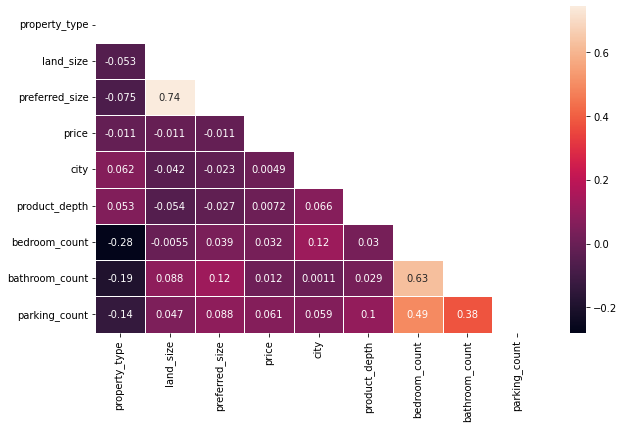

In [35]:

def corr(df) : 
    correlation  = df.corr()
    mask = np.triu(np.ones_like(correlation , dtype = bool))

    plt.figure(figsize = (10,6))
    sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)

corr(df2)

In [36]:
features = df2.drop('price',axis = 1)
label = df2['price']

In [37]:
def splitted_data(features , label) : 
    x_train,x_test,y_train,y_test = train_test_split(features, label , test_size = 0.3)
    
    print(f"Shape of x_train : {x_train.shape}")
    print(f"Shape of y_train : {y_train.shape}")
    print(f"Shape of x_test : {x_test.shape}")
    print(f"Shape of y_test: {y_test.shape}")
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = splitted_data(features , label)

Shape of x_train : (624, 8)
Shape of y_train : (624,)
Shape of x_test : (268, 8)
Shape of y_test: (268,)


In [38]:
pred_dict = {} 

def model(modelname , x_train  , x_test , y_train , y_test) : 
    
    model_build = modelname()
    model_build.fit(x_train,y_train)
    
    y_pred = model_build.predict(x_test) 
    
    return y_pred 

y_pred = model(LinearRegression, x_train,x_test,y_train,y_test)
pred_dict['linear_y_pred'] = y_pred 


In [39]:
campare_df = pd.DataFrame()

campare_df['Y_TEST'] = y_test 
campare_df['Y_PRED'] = y_pred 

campare_df.head()

Y_TEST        Y_PRED
RunDate                                    
2022-05-27 15:54:05  375000.0  1.100688e+11
2022-05-27 15:54:05  480000.0  6.438885e+10
2022-05-27 15:54:05  475000.0  3.824443e+10
2022-05-27 15:54:05  489000.0  4.532843e+11
2022-05-27 15:54:05  489000.0 -1.136994e+11

In [40]:
def rmse_func(y_pred,y_test) :
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))

    return rmse

rmse_func(y_pred,y_test)

192077791530.25787